# Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_parquet('./data/dota2_matches_cleaned.parquet')
df.head()

,league,league_tier,league_start_date_time,league_end_date_time,league_region,series_type,match_start_date_time,match_duration_seconds,first_blood_time_seconds,radiant_team_id,...,dire_player_4_networth,dire_player_5_name,dire_player_5_hero,dire_player_5_position,dire_player_5_lane,dire_player_5_role,dire_player_5_kills,dire_player_5_deaths,dire_player_5_assists,dire_player_5_networth
9,European Pro League 2023-2024 Season,PROFESSIONAL,2023-10-30 22:00:00,2024-10-30 22:00:00,EUROPE,BEST_OF_THREE,2024-10-14 20:29:53,2233,0,9017006,...,9343,proletariy,Underlord,POSITION_3,OFF_LANE,CORE,1,8,7,15178
11,European Pro League 2023-2024 Season,PROFESSIONAL,2023-10-30 22:00:00,2024-10-30 22:00:00,EUROPE,BEST_OF_THREE,2024-10-14 19:33:03,1656,23,8588969,...,10551,Riddys,Lich,POSITION_5,SAFE_LANE,HARD_SUPPORT,3,2,21,8247
14,European Pro League 2023-2024 Season,PROFESSIONAL,2023-10-30 22:00:00,2024-10-30 22:00:00,EUROPE,BEST_OF_THREE,2024-10-14 18:25:18,2063,121,9216247,...,13644,MaTson,Earthshaker,POSITION_2,MID_LANE,CORE,15,3,14,19558
16,European Pro League 2023-2024 Season,PROFESSIONAL,2023-10-30 22:00:00,2024-10-30 22:00:00,EUROPE,BEST_OF_THREE,2024-10-14 17:10:53,2548,215,9216247,...,17699,MaTson,Earthshaker,POSITION_2,MID_LANE,CORE,20,4,11,29511
18,Ultras Dota Pro League 2023-24,PROFESSIONAL,2023-10-31 22:00:00,2024-10-31 22:00:00,CIS,BEST_OF_THREE,2024-10-14 16:12:43,1739,172,8831040,...,7078,fungame,Spectre,POSITION_1,SAFE_LANE,CORE,4,7,14,13663


    * Para iniciar vamos a crear la columna radiant_win, donde usaremos las columnas de id que guardamos en la limpieza de datos, esto con el fin de facilitar el análisis posterior

In [3]:
df['radiant_win'] = (df['winner_id'] == df['radiant_team_id']).astype('int')

In [4]:
# convert into categorical variable
df['radiant_win'] = df['radiant_win'].astype('object')

In [5]:
# drop the id cols
df = df.drop(['winner_id', 'radiant_team_id', 'dire_team_id'], axis=1)

In [6]:
# verify null values only for networth
df.isna().sum()[df.isna().sum()>0]

radiant_player_1_networth    37239
radiant_player_2_networth    37239
radiant_player_3_networth    37239
radiant_player_4_networth    37239
radiant_player_5_networth    37239
dire_player_1_networth       37239
dire_player_2_networth       37239
dire_player_3_networth       37239
dire_player_4_networth       37239
dire_player_5_networth       37239
dtype: int64

In [7]:
# check the data info
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 137520 entries, 9 to 161229
Data columns (total 104 columns):
 #    Column                     Dtype         
---   ------                     -----         
 0    league                     object        
 1    league_tier                object        
 2    league_start_date_time     datetime64[ns]
 3    league_end_date_time       datetime64[ns]
 4    league_region              object        
 5    series_type                object        
 6    match_start_date_time      datetime64[ns]
 7    match_duration_seconds     Int32         
 8    first_blood_time_seconds   Int32         
 9    radiant_team_name          object        
 10   dire_team_name             object        
 11   radiant_kills              Int16         
 12   dire_kills                 Int16         
 13   radiant_player_1_name      object        
 14   radiant_player_1_hero      object        
 15   radiant_player_1_position  object        
 16   radiant_player_1_lane  

* Eliminamos las variables de tipo id ya que no serán relevantes para el análisis

## Univariate analysis

### Categorical columns

* Ya que son muchas columnas, y algunas son similares, vamos a dividirlas en las generales, y las que corresponden a los jugadores, además solo consideraremos a las que tienen cardinalidad baja (<10 categorías/divisiones)

In [8]:
# get all categorical cols
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['league', 'league_tier', 'league_region', 'series_type',
       'radiant_team_name', 'dire_team_name', 'radiant_player_1_name',
       'radiant_player_1_hero', 'radiant_player_1_position',
       'radiant_player_1_lane', 'radiant_player_1_role',
       'radiant_player_2_name', 'radiant_player_2_hero',
       'radiant_player_2_position', 'radiant_player_2_lane',
       'radiant_player_2_role', 'radiant_player_3_name',
       'radiant_player_3_hero', 'radiant_player_3_position',
       'radiant_player_3_lane', 'radiant_player_3_role',
       'radiant_player_4_name', 'radiant_player_4_hero',
       'radiant_player_4_position', 'radiant_player_4_lane',
       'radiant_player_4_role', 'radiant_player_5_name',
       'radiant_player_5_hero', 'radiant_player_5_position',
       'radiant_player_5_lane', 'radiant_player_5_role', 'dire_player_1_name',
       'dire_player_1_hero', 'dire_player_1_position', 'dire_player_1_lane',
       'dire_player_1_role', 'dire_player_2_name', 'dire_playe

In [9]:
general_cols = [ col for col in categorical_cols if '_player_' not in col and df[col].nunique() <= 10]
# general_cols = [ col for col in categorical_cols if '_player_' not in col]
general_cols

['league_tier', 'league_region', 'series_type', 'radiant_win']

In [10]:
# for player cols, we just need a sample, because the format is the same for the other ones
player_cols_sample = [ col for col in categorical_cols if '_player_1_' in col and df[col].nunique() <= 10]
player_cols_sample

['radiant_player_1_position',
 'radiant_player_1_lane',
 'radiant_player_1_role',
 'dire_player_1_position',
 'dire_player_1_lane',
 'dire_player_1_role']

* Graficamos la distribución de las variables categóricas

In [11]:
def plot_univariate_distribution(cols, n_cols):
    
    # n_cols = 3
    n_rows = (len(cols) - 1) // n_cols + 1
    
    # additional config provided by deepseek to prevent asian characters warning
    # plt.rcParams['font.sans-serif'] = ['SimHei']  # Fuente que soporta CJK
    plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Liberation Sans']  # Si no funciona agregar SimHei(necesita installation), usar opciones comunes
    plt.rcParams['axes.unicode_minus'] = False    # Evita errores con símbolos negativos
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    
    if n_cols > 1 or n_rows > 1:
        axes = axes.flatten()
    else:
        axes = [axes]

    for i, col in enumerate(cols):
        sns.countplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].tick_params(axis='x', rotation=45)
    
    for j in range(len(cols), len(axes)):
        axes[j].set_visible(False)
        
    plt.tight_layout()
    plt.show()

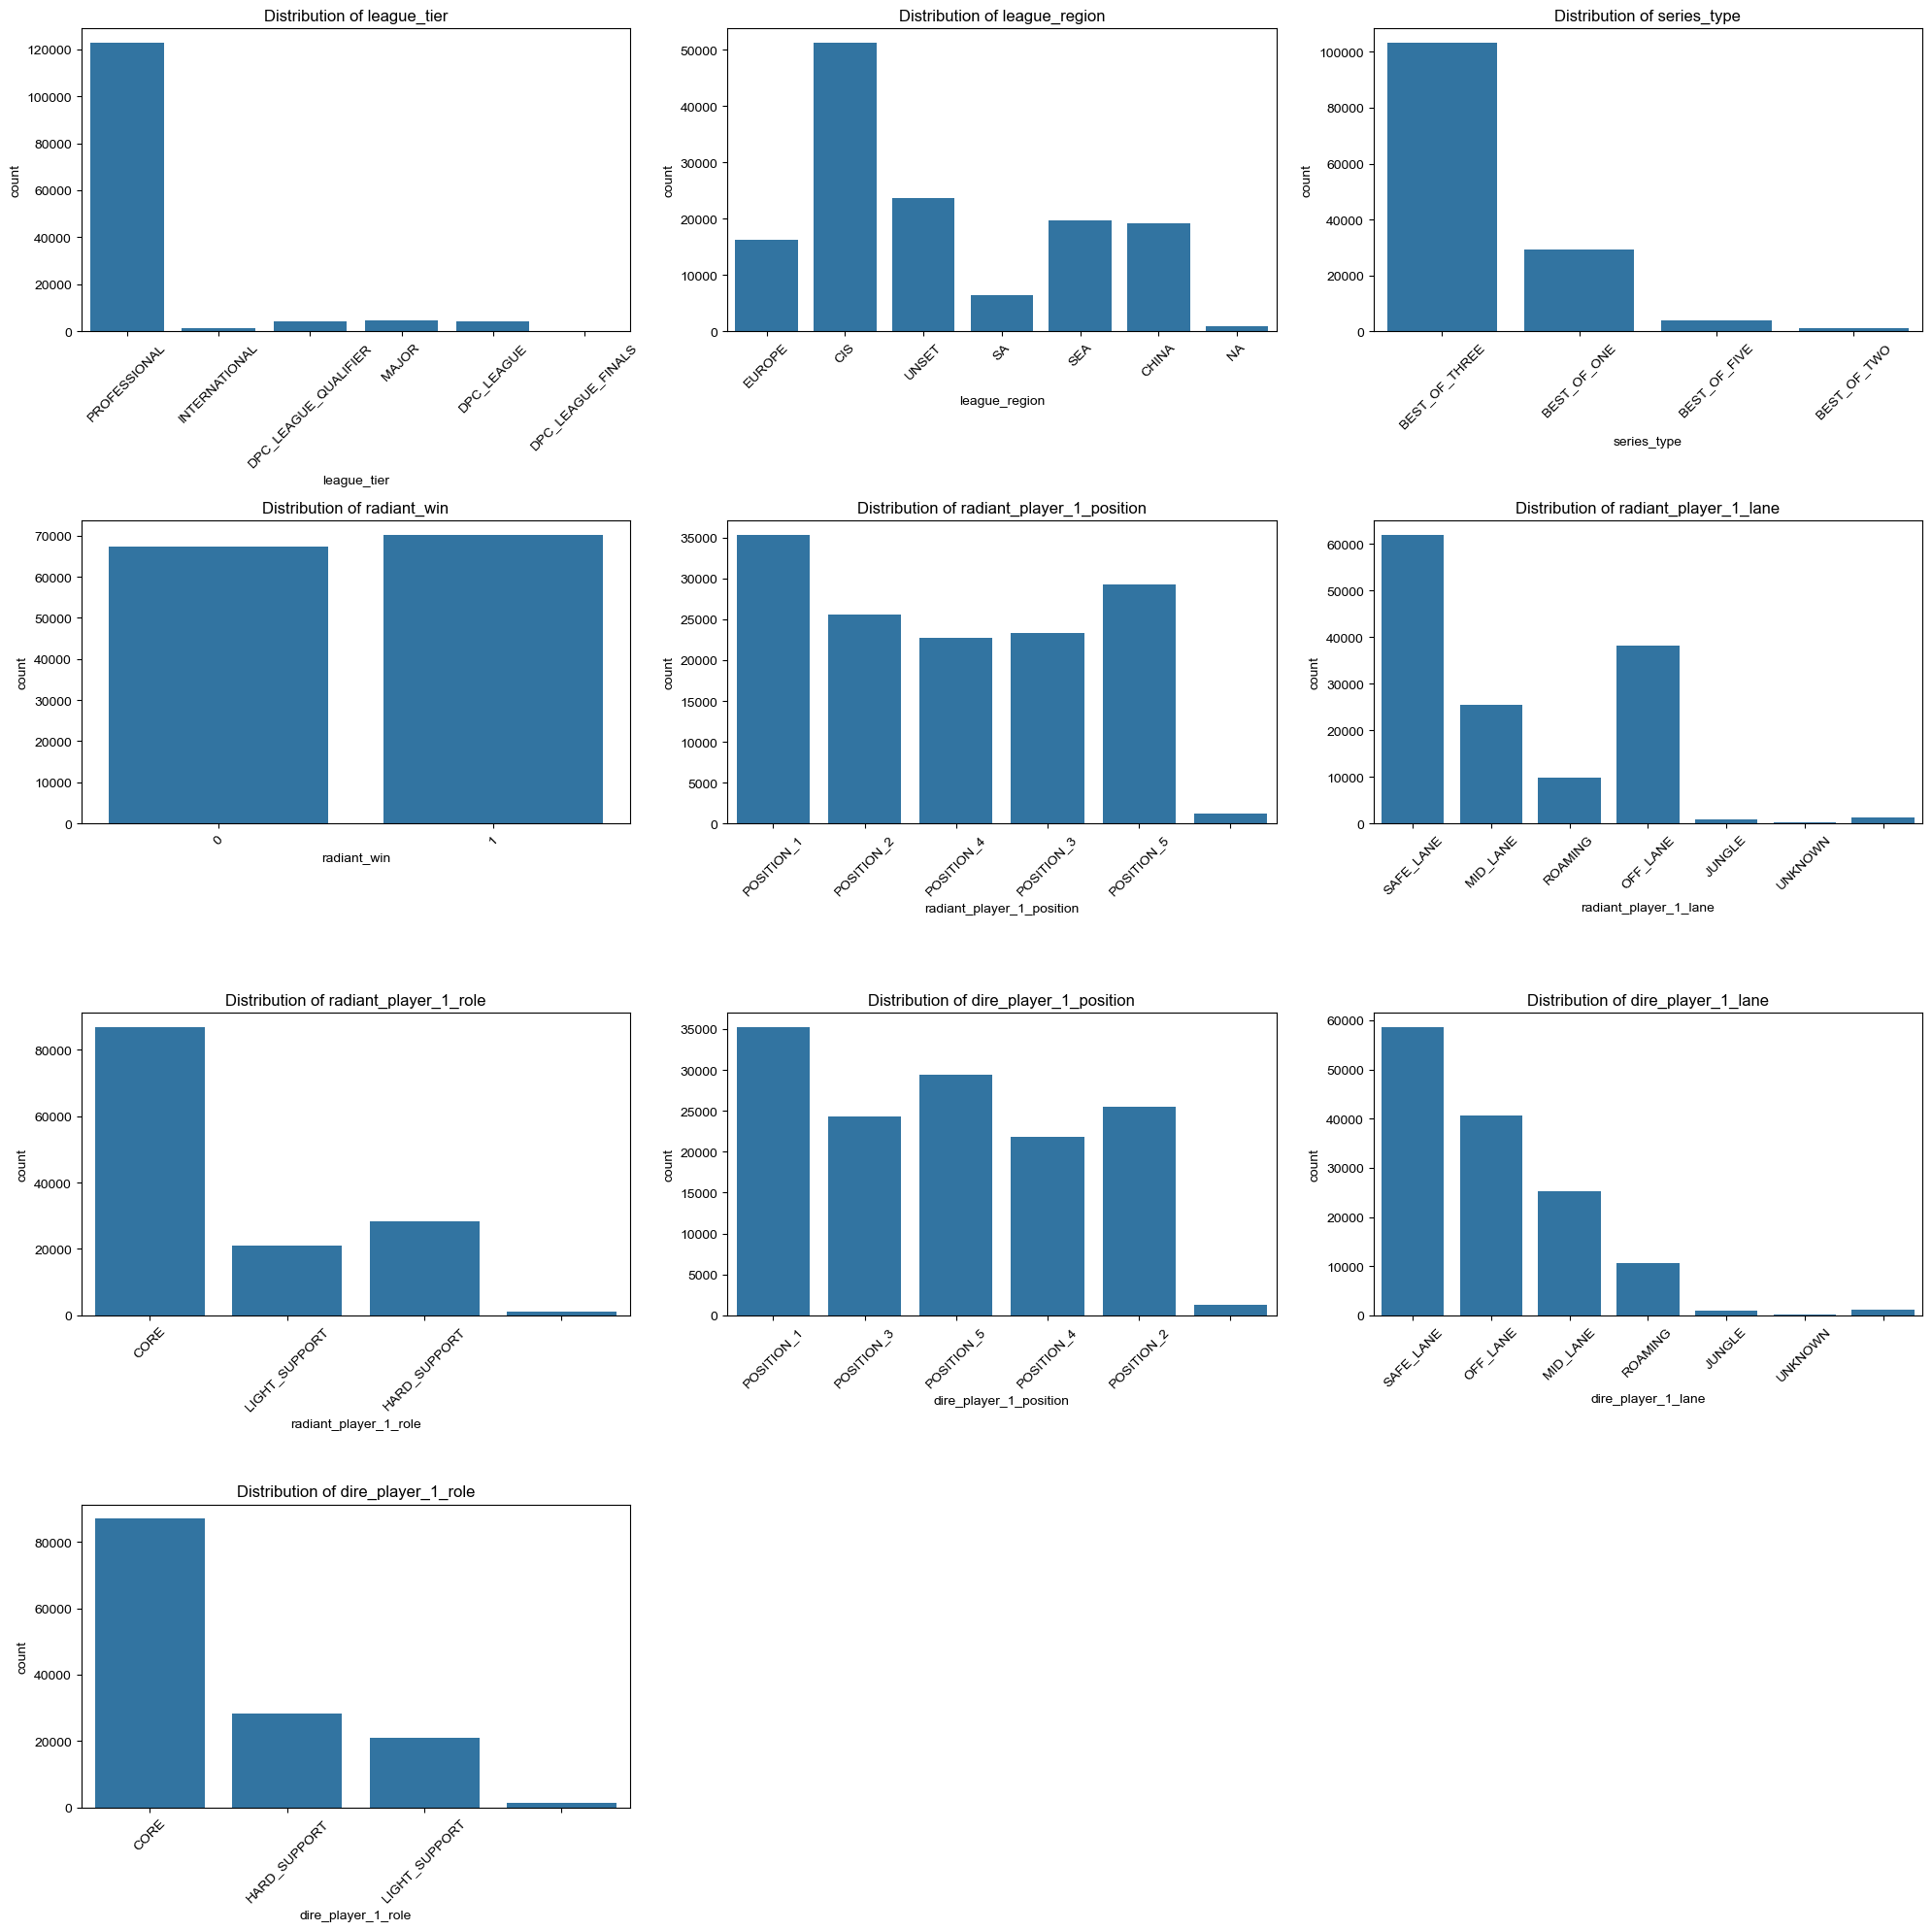

In [12]:
plot_univariate_distribution(general_cols + player_cols_sample, 3)

* Vemos que la distribución de estas columnas que seleccionamos es en general correcta, pero parece que hay ciertos valores en blanco o vacíos, quizás los omitimos en la etapa de data cleaning, así que vamos a revisarlos aquí

In [13]:
pd.concat([
df['radiant_player_1_position'].value_counts(),
df['radiant_player_1_lane'].value_counts(),
df['radiant_player_1_role'].value_counts()
], keys=['radiant_p1_pos', 'radiant_p1_lane', 'radiant_p1_role'])

radiant_p1_pos   POSITION_1       35347
                 POSITION_5       29250
                 POSITION_2       25601
                 POSITION_3       23375
                 POSITION_4       22700
                                   1247
radiant_p1_lane  SAFE_LANE        61928
                 OFF_LANE         38153
                 MID_LANE         25369
                 ROAMING           9810
                                   1247
                 JUNGLE             829
                 UNKNOWN            184
radiant_p1_role  CORE             86864
                 HARD_SUPPORT     28339
                 LIGHT_SUPPORT    21070
                                   1247
Name: count, dtype: int64

* Vemos que la cantidad de registros es la misma, así que probablemente son los mismos registros, y según mi conocimiento en el tema, no son datos faltantes ya que las divisiones están completas, e imputarlos sería difícil ya que es difícil identificar a qué grupo pertenece, y reemplazar con valores estándar como media, mediana o moda podría no ser preciso. Por este motivo solo las eliminaremos, además de que son muy pocos registros

In [14]:
df = df.drop(df[df['radiant_player_1_role']==''].index)
df.shape

(136273, 104)

* También eliminamos las filas con valor "Unknown", ya que no aportarán al análisis y además son muy pocos. Lo hacemos para todas las columnas categóricas ya que encontramos que varias columnas tienen algunas pocas

In [15]:
df = df.drop(df[df[categorical_cols].eq('UNKNOWN').any(axis=1)].index)

* Graficamos nuevamente la distribución

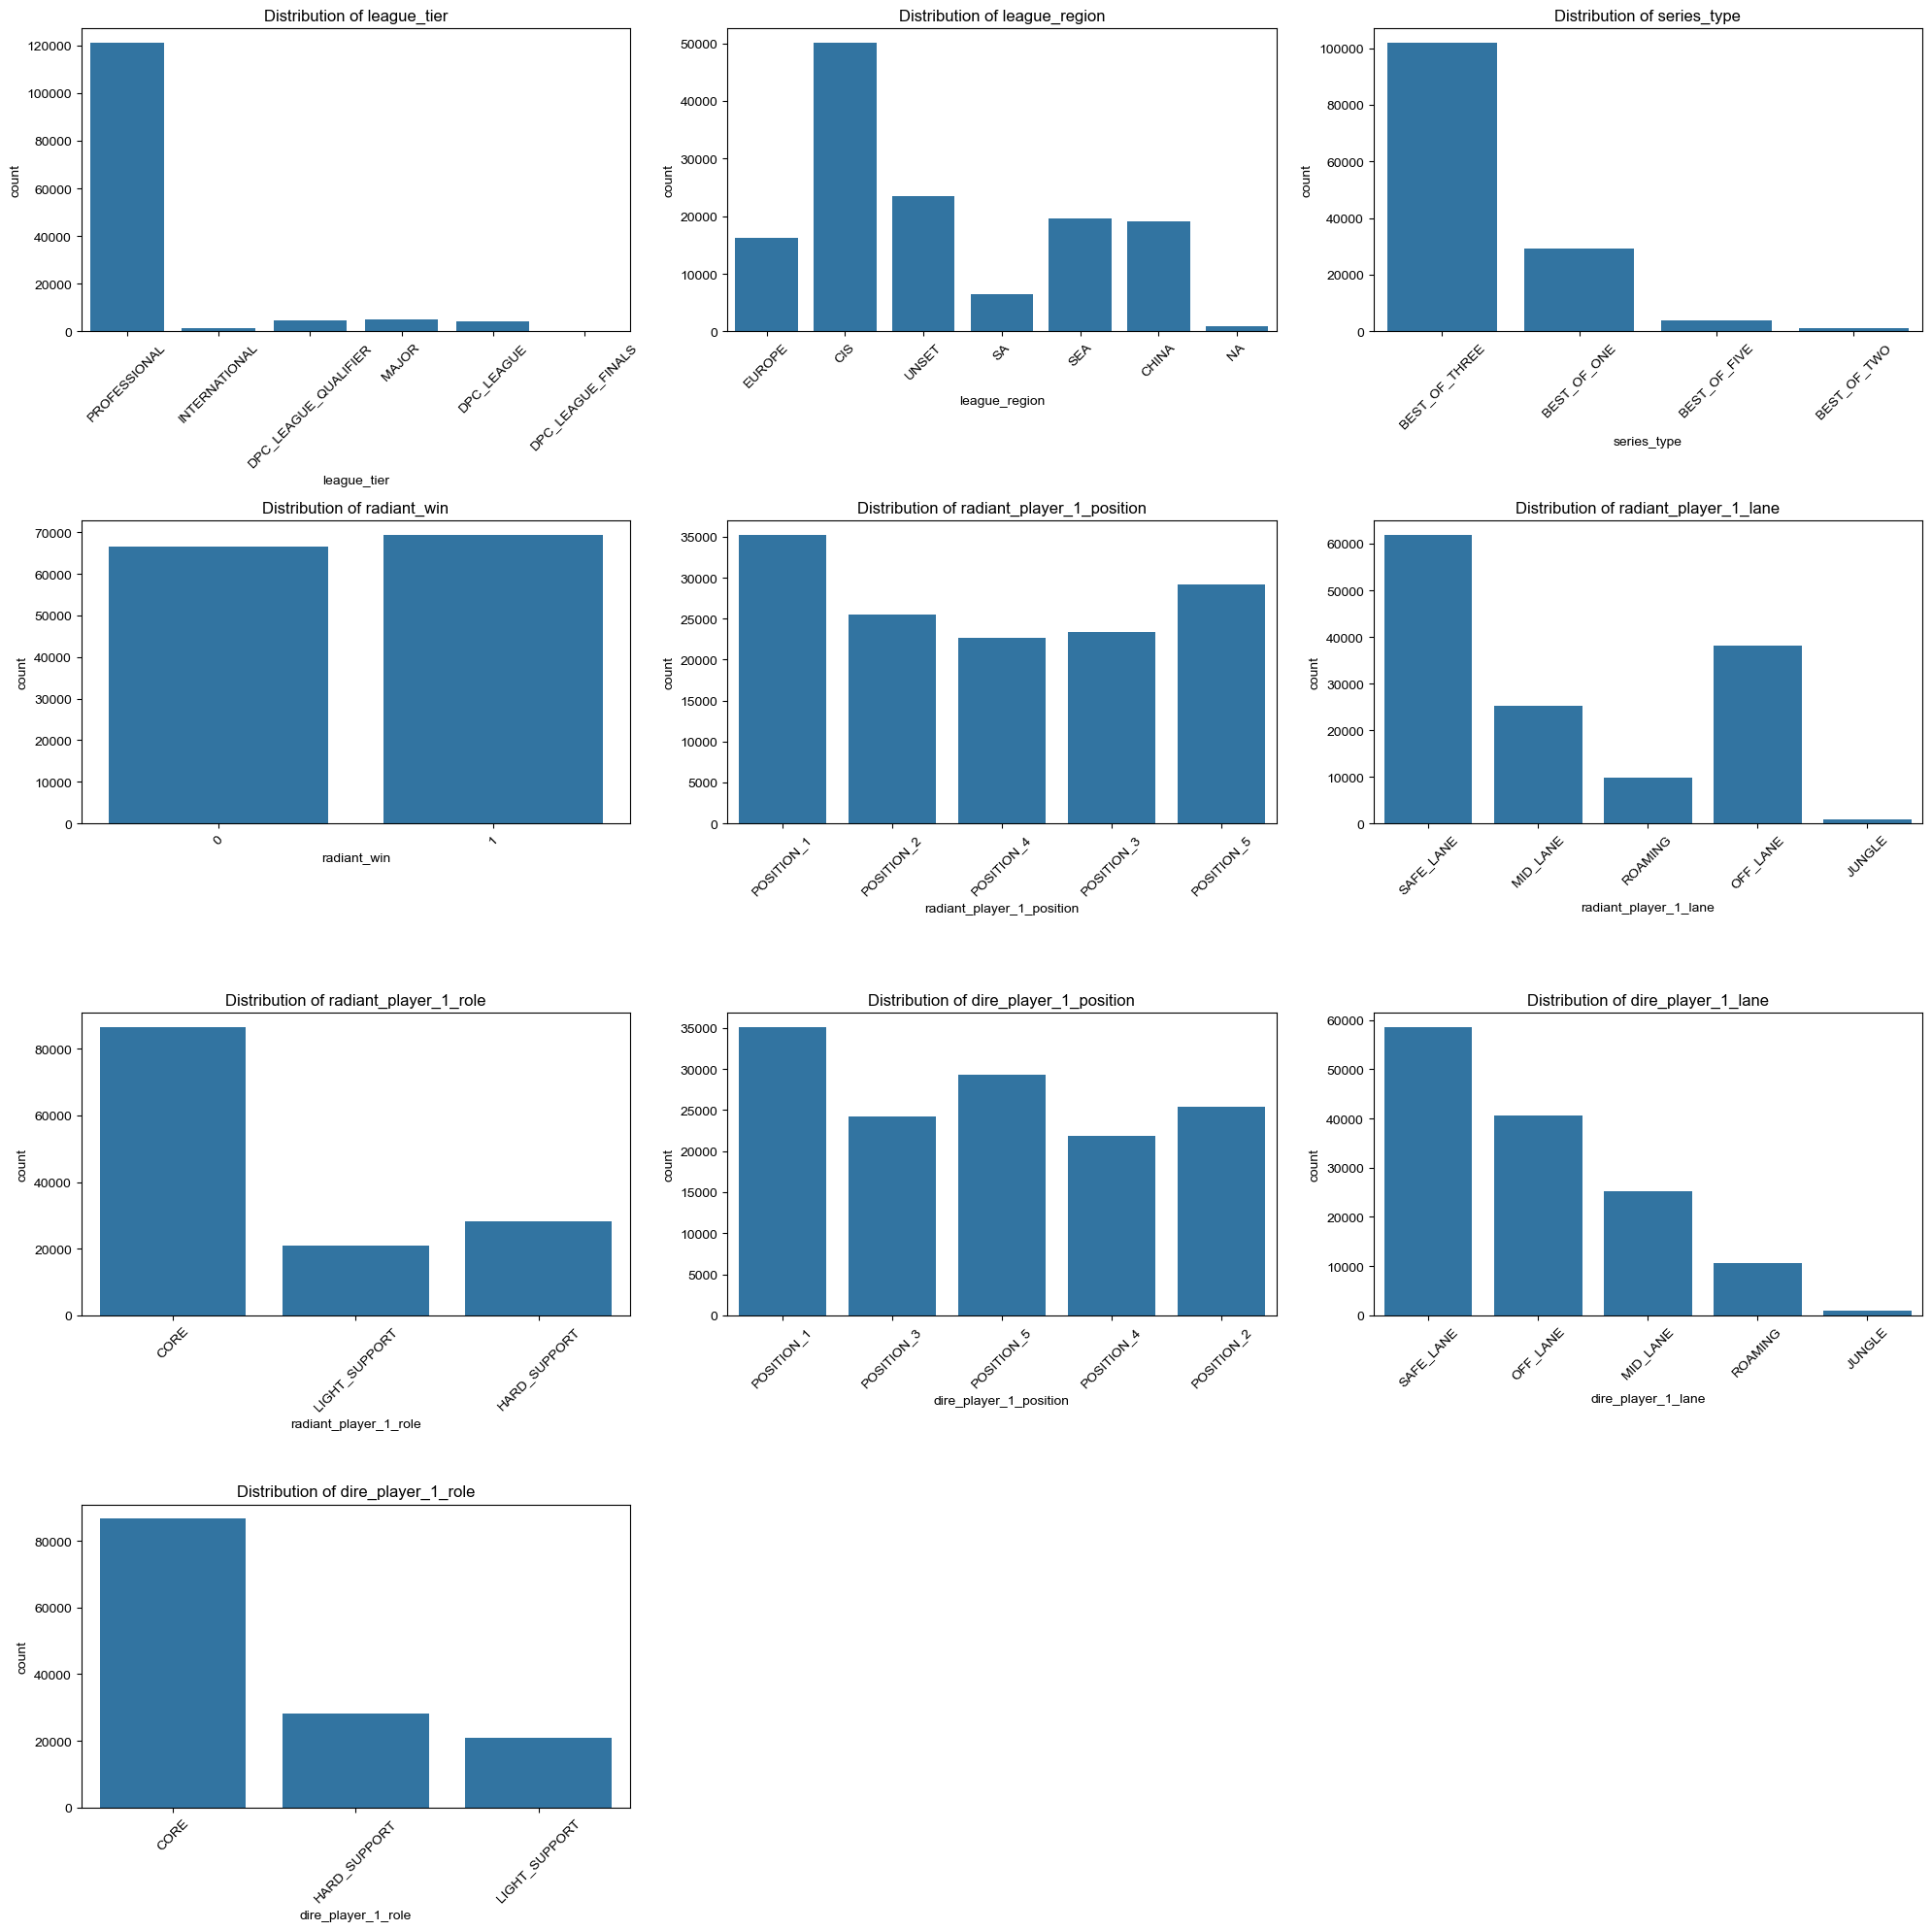

In [16]:
plot_univariate_distribution(general_cols + player_cols_sample, 3)

    * Vemos que cantidad de victorias del lado radiant es similar a la de dire, pero radiant está ligeramente por encima
    * Podemos identificar a primera vista que el tier de la liga principal es la "PROFESIONAL", parece ser de un 90% aproximadamente
    * En league_region vemos que hay más registros de la "CIS", y la menor es "NA", las demás son similares, siendo 'SA' la menor de estas
    * En el tipo de partida, vemos que por diferencia, el más jugado es el de BEST_OF_THREE
    * Vempos que el rol con mayor frecuencia es el CORE, ya que este incluye 3 coles (hard carry, midlane y offlane)
    * Las distribuciones por jugador por sí solas no ofrecen mucha información, ya que estas siempre se cumplen en todas las partidas, así que deberían ser similares

### Numeric columns

In [17]:
numeric_cols = df.select_dtypes(include='int').columns
numeric_cols

Index(['match_duration_seconds', 'first_blood_time_seconds',
       'radiant_player_1_networth', 'radiant_player_2_networth',
       'radiant_player_3_networth', 'radiant_player_4_networth',
       'radiant_player_5_networth', 'dire_player_1_networth',
       'dire_player_2_networth', 'dire_player_3_networth',
       'dire_player_4_networth', 'dire_player_5_networth'],
      dtype='object')

In [18]:
def plot_univariate_distribution_numeric(cols, n_cols, plot='hist'):
    
    n_rows = (len(cols) - 1) // n_cols + 1
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    
    if n_cols > 1 or n_rows > 1:
        axes = axes.flatten()
    else:
        axes = [axes]

    for i, col in enumerate(cols):
        # col_count = df[col].value_counts()
        if plot == 'hist':
            sns.histplot(data=df, x=col, ax=axes[i], kde=True, color='purple')
        elif plot == 'box':
            sns.boxplot(data=df, x=col, ax=axes[i])
            
        axes[i].set_title(f'Distribution of {col}')
    
    for j in range(len(cols), len(axes)):
        axes[j].set_visible(False)
        
    plt.tight_layout()
    plt.show()

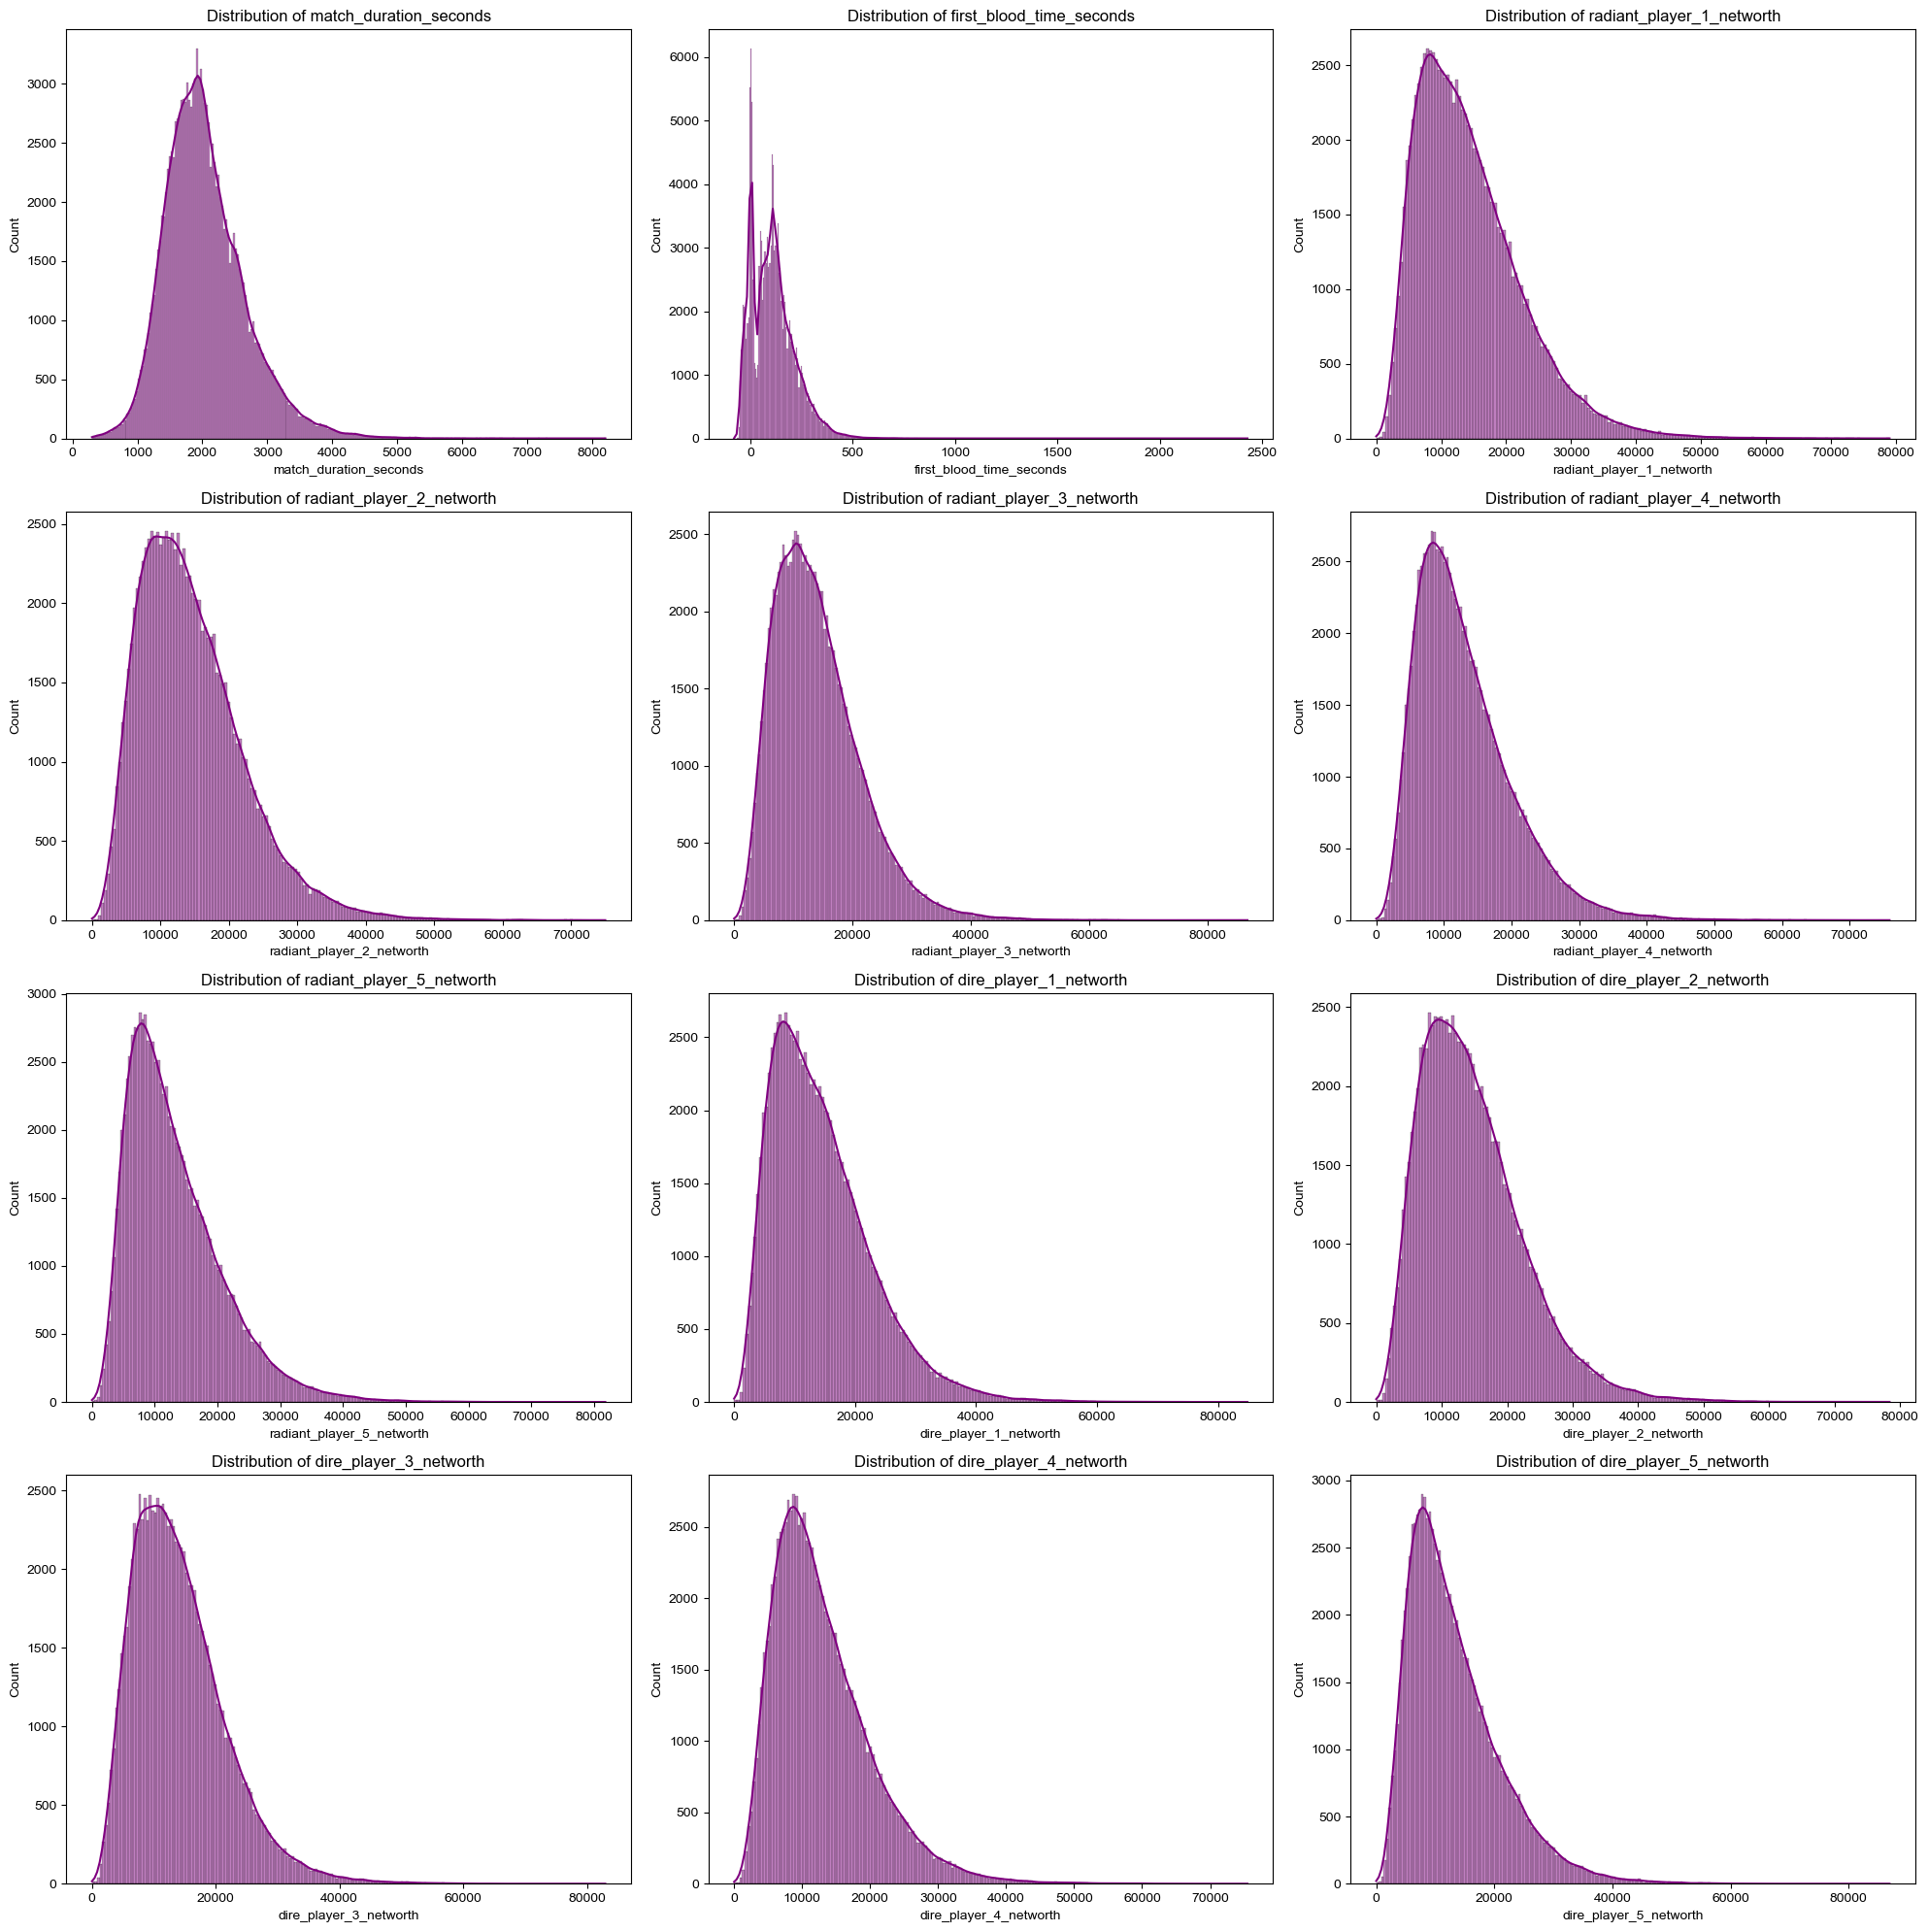

In [19]:
plot_univariate_distribution_numeric(numeric_cols, 3)

Con los histogramas, de las variables numéricas podemos identificar:
* Las partidas suelen durar (match_duration_seconds) entre 1500 y 2500 mayormente, pero el rango general es de 1000 a 3000 segundos
* Las primeras sangres (first_blood_time_seconds) suelen ocurrir aproximadamente en los primeros 5 minutos de partida, y hay casos donde ocurre en los segundos antes antes de que inicie la partida (< 0)
* El valor neto (player networth) en general vemos que es similar, llega hasta los 2000 y 3000, pero el problema es que en esta columna tenemos datos faltantes, que quizás sesgan un poco esta información

* Ahora probaremos con boxplots

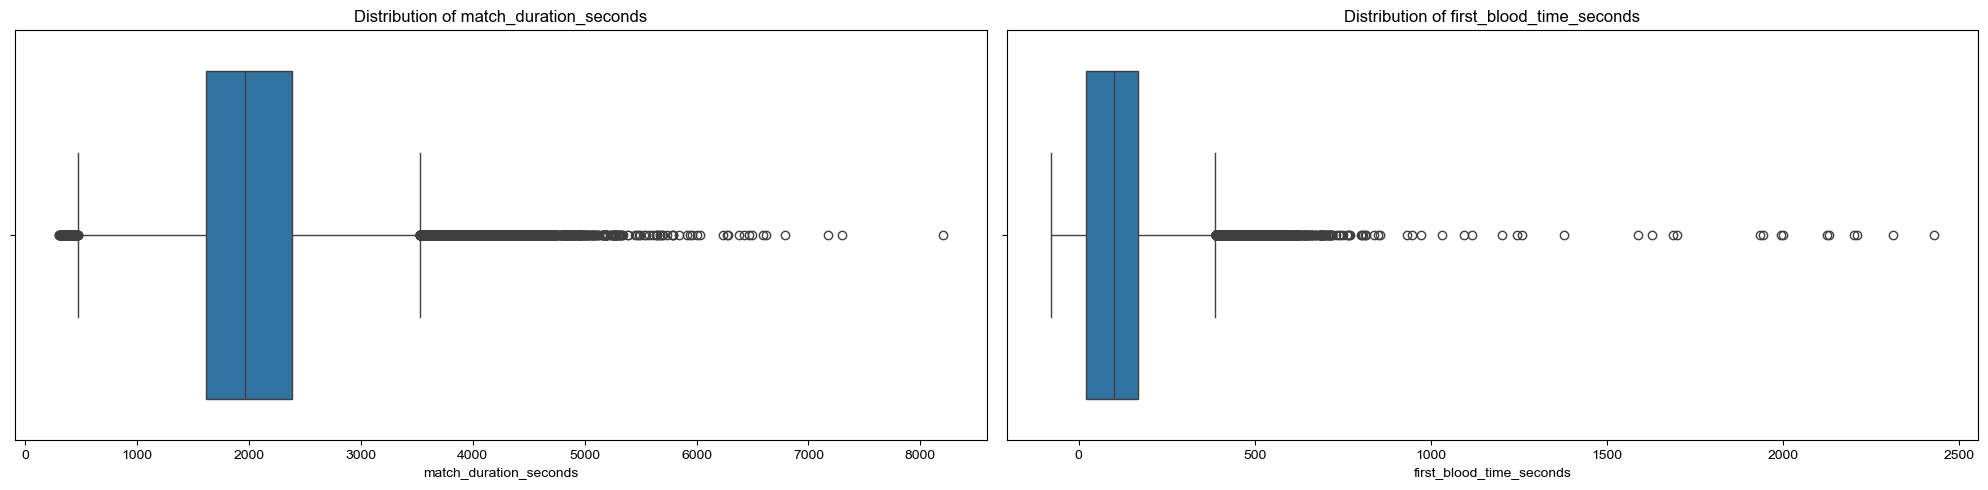

In [20]:
plot_univariate_distribution_numeric(['match_duration_seconds', 'first_blood_time_seconds'], 2, 'box')

* Acá confirmamos la distribución, vemos que la mediana es 2000 aproximadamente el duración del juego y que la mayor cantidad de juegos duran de 1500 a 2500 segundos aproximadamente
* Podemos ver presencia de outliers (valores atípicos), ya que según esto hay casos donde hay juegos que duran más de 7000 segundos, y hasta más que 8000, que equivaldría a más de 2 horas de juego, lo cual no es imposible, pero sí es muy raro

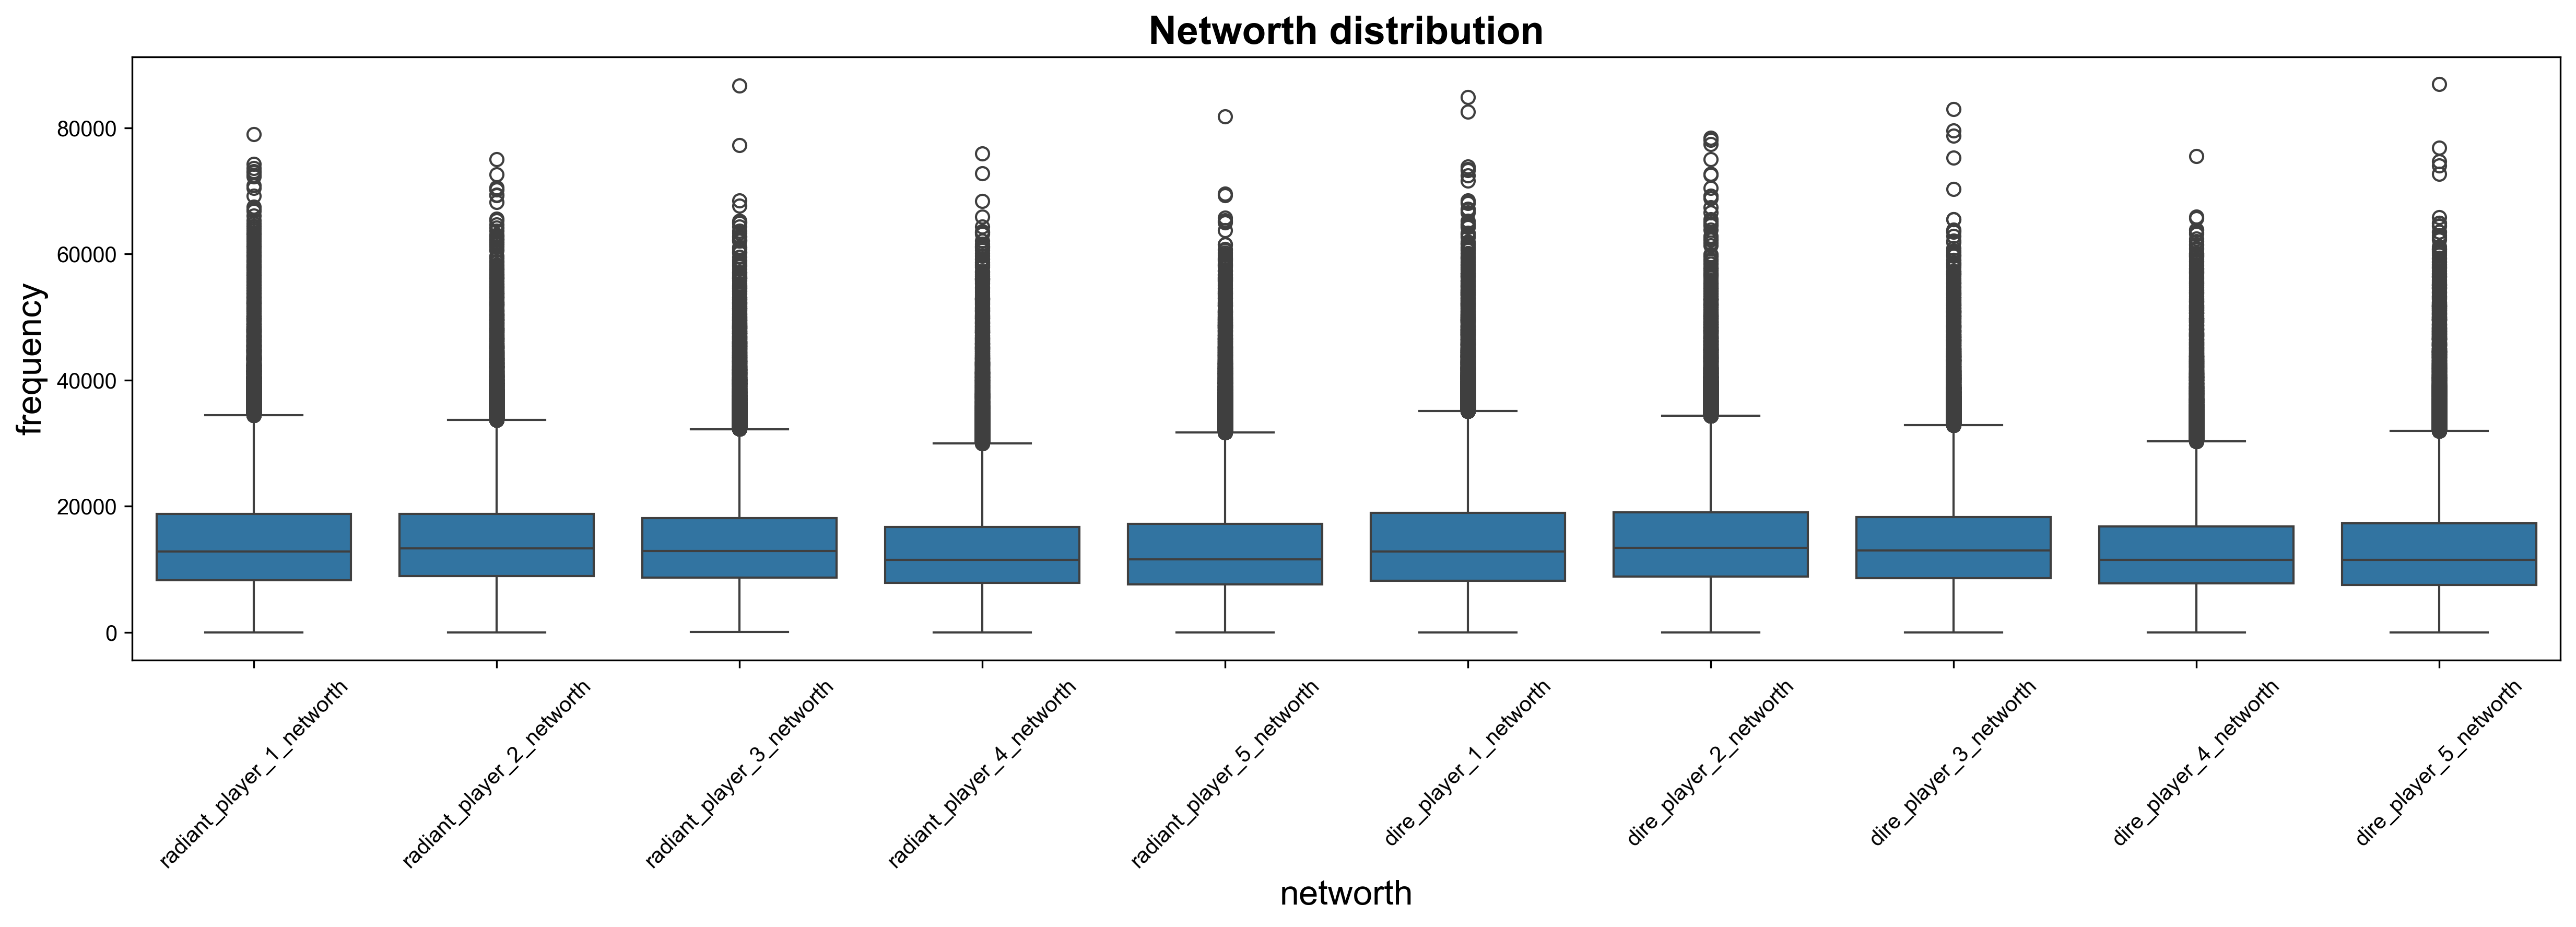

In [21]:
networth_cols = [col for col in numeric_cols if col not in ['match_duration_seconds', 'first_blood_time_seconds']]

plt.figure(figsize=(20,5), dpi=300)
df_melted = pd.melt(df, value_vars=networth_cols)
sns.boxplot(df_melted, x='variable', y='value')
plt.title('Networth distribution', fontsize=18, fontweight='bold')
plt.xticks(rotation=45)
plt.xlabel('networth', fontsize=16)
plt.ylabel('frequency', fontsize=16)
plt.show()

* Para el caso de los networth, vemos que su distribución es normal lo cual es normal ya que el networth depende del rol del jugador y posición, no en las divisiones de jugador 1,2,3,4 o 5

    * Ahora antes de pasar al análisis bivariado, vamos a definir la variable objetivo (target) para el análisis y futuro modelo de machine learning de ser posible. Así que lo más adecuado para este dataset sería la columna "radiant_win" ya que se podría hacer un modelo de regresión logística para predecir si un equipo va a ganar o no en base a los datos brindados


Generando el gráfico de distribución de victorias...


C:\Users\RAFAEL-PC\AppData\Local\Temp\ipykernel_14892\2243265134.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Dire Wins', 'Radiant Wins'], fontsize=11)


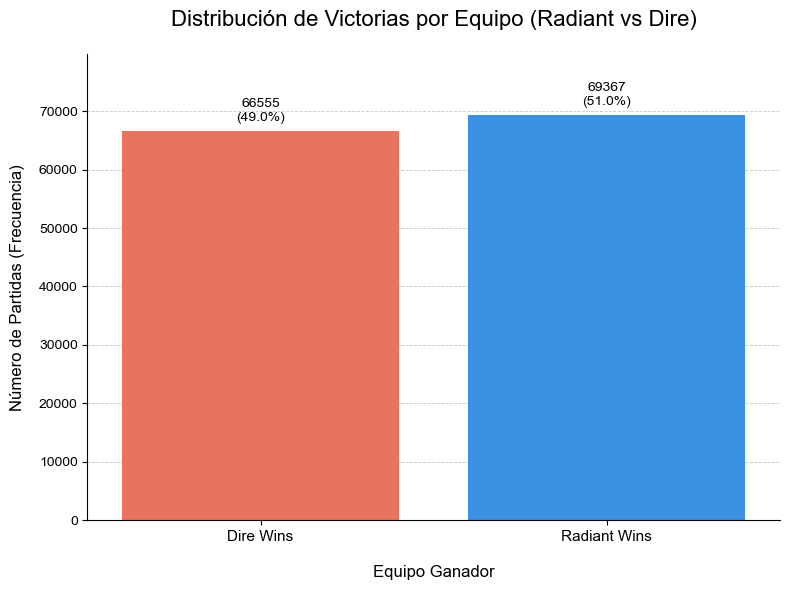

In [22]:

# COUNPLOT PROVIDED BY GEMINI 2.5
np.random.seed(42) # para reproducibilidad

# --- Asegurar el tipo de dato correcto (int) ---
if df['radiant_win'].dtype == 'object':
    df['radiant_win'] = df['radiant_win'].astype(int)

# --- Calcular Frecuencias y Total (necesario para anotaciones) ---
counts = df['radiant_win'].value_counts().sort_index() # Asegura orden 0, 1
total = len(df)

# =====================================================================
# Gráfico de Barras (Countplot) con Seaborn y Refinamientos Matplotlib
# =====================================================================
print("Generando el gráfico de distribución de victorias...")

# --- Configuración de Estilo Opcional (Seaborn) ---
# sns.set_theme(style="whitegrid") # Puedes probar diferentes estilos

plt.figure(figsize=(8, 6)) # Tamaño adecuado para la legibilidad

# --- Crear el Countplot ---
# Usamos una paleta de colores que contraste bien. Puedes personalizarla.
# 'order=[0, 1]' asegura que Dire (0) esté a la izquierda y Radiant (1) a la derecha.
ax = sns.countplot(data=df,
                   x='radiant_win',
                   hue='radiant_win',
                   legend=False,
                   palette=['#FF6347', '#1E90FF'], # Rojo Tomate para Dire (0), Azul Dodger para Radiant (1) - Ejemplo
                   order=[0, 1])

# --- Mejoras Profesionales y Etiquetas Precisas ---

# 1. Título claro y descriptivo
ax.set_title('Distribución de Victorias por Equipo (Radiant vs Dire)', fontsize=16, pad=20)

# 2. Etiquetas de ejes informativas
ax.set_xlabel('Equipo Ganador', fontsize=12, labelpad=15)
ax.set_ylabel('Número de Partidas (Frecuencia)', fontsize=12, labelpad=10)

# 3. Etiquetas específicas en el eje X
#    Asegúrate de que estas etiquetas corresponden al 'order=[0, 1]'
ax.set_xticklabels(['Dire Wins', 'Radiant Wins'], fontsize=11)
ax.tick_params(axis='x', rotation=0) # Asegurar que las etiquetas no se roten si son cortas

# 4. Añadir Anotaciones (Conteo y Porcentaje) sobre cada barra
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    value = counts.iloc[i] # Obtenemos el valor del conteo correspondiente a la barra
    percentage = f'{100 * value / total:.1f}%' # Calcular porcentaje
    
    # Colocar el texto sobre la barra
    ax.annotate(f'{value}\n({percentage})', # Texto: conteo y porcentaje
                xy=(bar.get_x() + bar.get_width() / 2, height), # Posición XY (centro superior de la barra)
                xytext=(0, 5),  # Desplazamiento vertical de 5 puntos
                textcoords="offset points",
                ha='center', va='bottom', # Alinear centro horizontal, anclaje inferior
                fontsize=10, color='black') # Tamaño y color de fuente

# 5. Mejorar Estética del Gráfico
ax.spines['top'].set_visible(False)    # Ocultar borde superior
ax.spines['right'].set_visible(False)   # Ocultar borde derecho
ax.yaxis.grid(True, linestyle='--', linewidth=0.6, alpha=0.7) # Rejilla horizontal sutil
ax.set_axisbelow(True) # Poner la rejilla detrás de las barras

# 6. Ajustar límite del eje Y para dar espacio a las anotaciones
#    Multiplicamos el máximo conteo por 1.15 para dejar un 15% de espacio extra
try:
    max_count = counts.max()
    ax.set_ylim(0, max_count * 1.15)
except ValueError: # Manejar caso donde no haya datos
    ax.set_ylim(0, 1) 

# 7. Ajuste final del layout
plt.tight_layout()

# --- Mostrar el Gráfico ---
# plt.savefig('distribucion_victorias_radiant_dire.png', dpi=300) # Descomentar para guardar
plt.show()

## Bivariate Analysis

* Ahora veremos la relación de nuestras variables independientes son la variable objetivo/target (radiant_win)

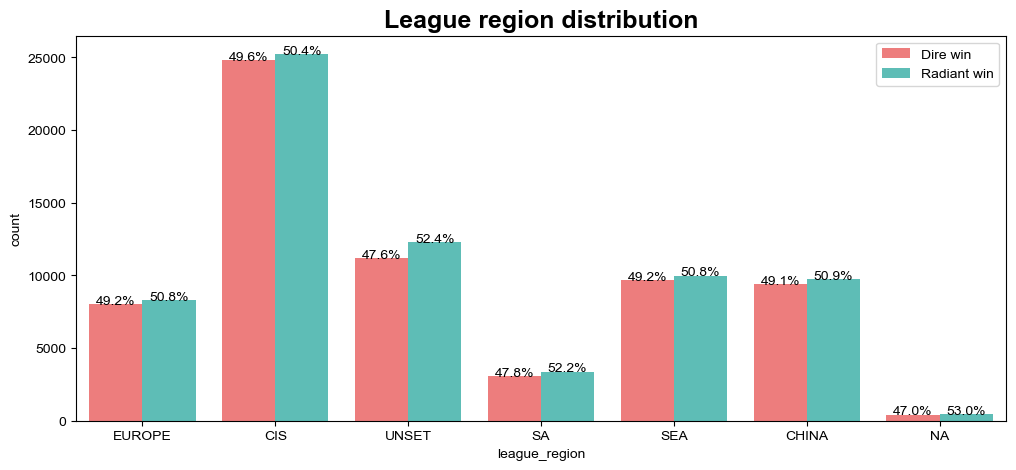

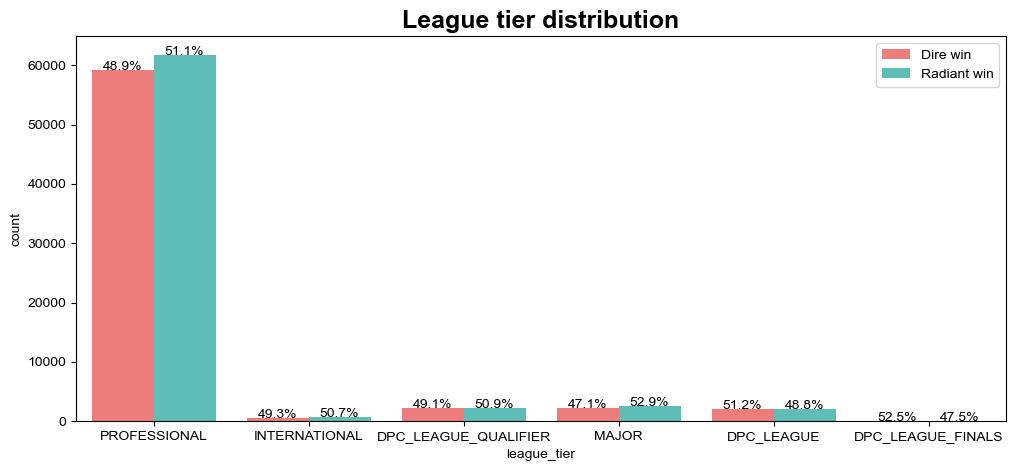

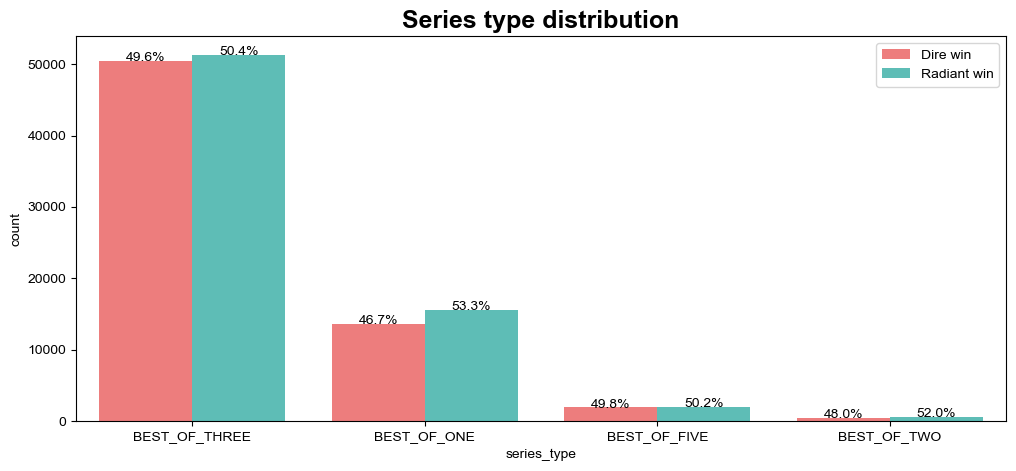

In [ ]:
main_cat_cols = ['league_region', 'league_tier', 'series_type']

for col in main_cat_cols:
    plt.figure(figsize=(12, 5))
    sns.countplot(data=df, x=col, hue='radiant_win', palette=['#FF6B6B', '#4ECDC4'])
    
    # show percentage for each category (provided by chatgpt)
    ax = plt.gca()
    for i in range(len(ax.containers[0])):
        group_total = sum([container[i].get_height() for container in ax.containers])
        for container in ax.containers:
            patch = container[i]
            height = patch.get_height()
            if height > 0:
                percentage = height / group_total * 100
                ax.text(
                    patch.get_x() + patch.get_width() / 2,
                    height + 1,
                    f'{percentage:.1f}%',
                    ha='center',
                    fontsize=10
                )

    
    normalized_col = col.replace('_', ' ').capitalize()
    plt.legend(labels=['Dire win', 'Radiant win'])
    plt.title(f'{normalized_col} distribution', fontsize=18, fontweight='semibold')
    plt.show()

* En los tipos de torneos vemos que la diferencia entre victorias de dire y radiant es mínima, pero vemos que favorece principalmente a radiant
* Y vemos que esta tendencia ocurre en todas las regiones donde se juega dota 2
* En los tipos de serie, vemos que donde hay un poco más de diferencia en el porcentaje es en la serie BEST_OF_ONE

## Numeric variables

* Acá vimos que habían presencias de outliers, que si bien son valores que no son imposibles de conseguir, son muy extraños y es posible que afecte nuestro análisis o futuro desempeño del modelo, pero por ahora los mantendremos ya que no son errores

In [45]:
main_numeric_cols = ["match_duration_seconds", "first_blood_time_seconds"]


In [66]:
# create function to get n° of outliers (provided by deepseek)

import statistics

def get_outliers_iqr(column, multiplier=1.5):
    Q1, Q3 = np.percentile(column, [25, 75])
    IQR = Q3 - Q1 # rango intercuartil
    min_limit = Q1 - multiplier * IQR
    max_limit = Q3 + multiplier * IQR
    return column[(column < min_limit) | (column > max_limit)]

In [71]:
# solo con el multiplicador 6 obtenemos los verdaderos outliers, pero aún no haremos nada conellos
get_outliers_iqr(df['match_duration_seconds'], 6)

40286     8199
129469    7171
158256    7304
Name: match_duration_seconds, dtype: Int32

* Vamos a graficar las distribuciones de tiempo para las variables de duración de la partida y la de first_blood, para ver si es diferente cuando radiant o dire ganan

In [ ]:
# Configura los colores oficiales de Dota 2 (Radiant verde, Dire rojo)
dota_palette = {'Dire': '#C21807', 'Radiant': '#4CAF50'}  # Rojo oscuro y verde esmeralda

# Mapea los valores 0/1 a etiquetas
df['team_win'] = df['radiant_win'].map({0: 'Dire', 1: 'Radiant'})

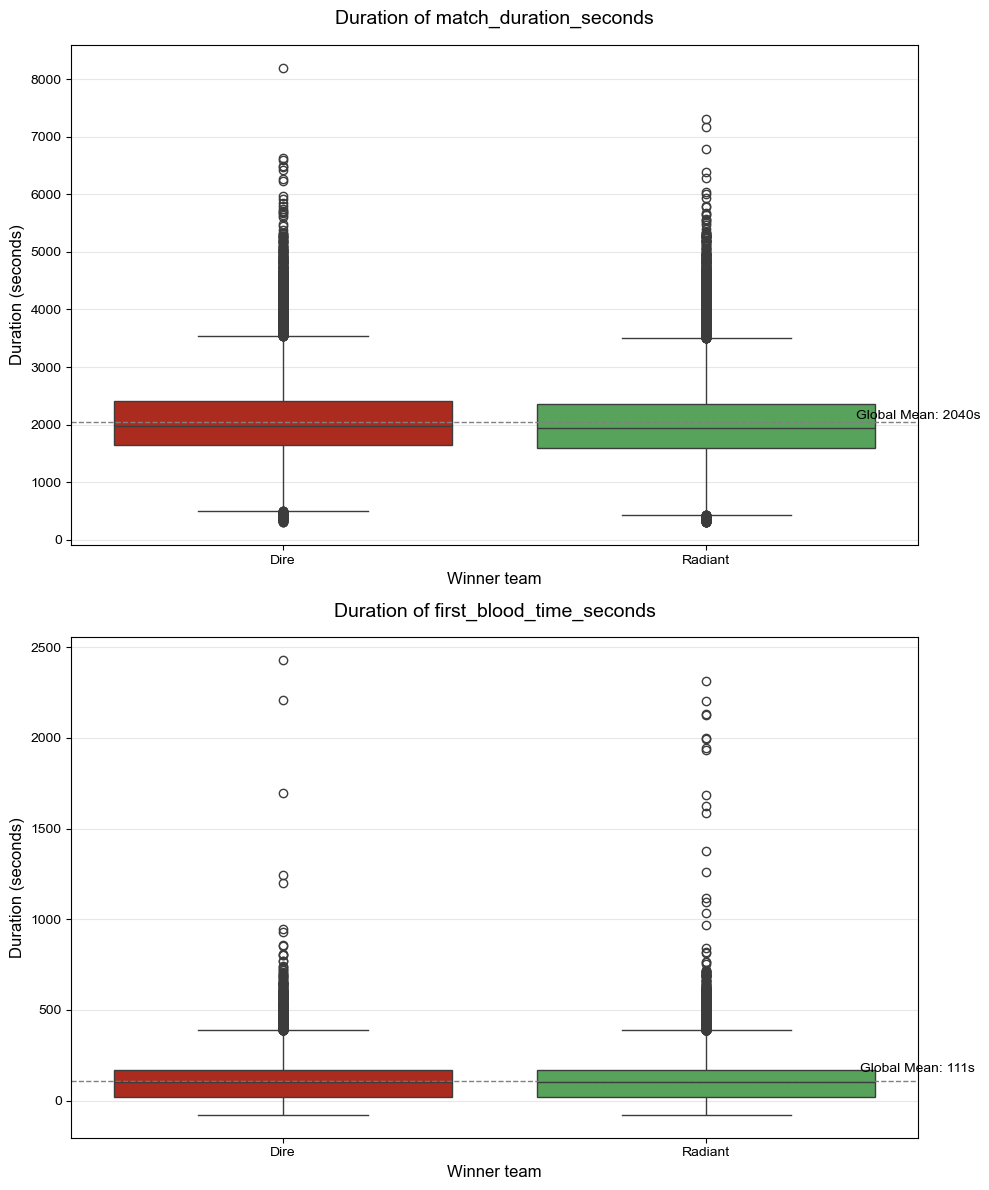

In [99]:
# plot boxplot for numeric variables (provided by deepseek)

fig, axes = plt.subplots(nrows=len(main_numeric_cols), figsize=(10, 6*len(main_numeric_cols)))  

for ax, col in zip(axes, main_numeric_cols):
    # Crea el gráfico
    sns.boxplot(data=df, 
                x='team_win', 
                y=col,
                hue='team_win',
                palette=dota_palette,
                ax=ax,
                order=['Dire', 'Radiant'])  # Orden específico

    # Personalización profesional
    ax.set_title(f'Duration of {col}', fontsize=14, pad=15)
    ax.set_xlabel('Winner team', fontsize=12)
    ax.set_ylabel('Duration (seconds)', fontsize=12)
    ax.grid(axis='y', alpha=0.3)

    # Opcional: Añadir líneas de referencia
    mean_duration = df[col].mean()
    ax.axhline(mean_duration, color='gray', linestyle='--', linewidth=1)
    ax.text(1.5, mean_duration+50, f'Global Mean: {mean_duration:.0f}s', ha='center')

plt.tight_layout()
plt.show()

* Vemos que la distribución es similar, al igual que los outliers
* En promedio la duración de partidas y el tiempo que se demoran en realizar el first blood es el mismo

* Ahora veremos si la diferencia kills es muy influyente en la victoria de un equipo

In [100]:
df['kills_diff'] = df['radiant_kills'] - df['dire_kills']

C:\Users\RAFAEL-PC\AppData\Local\Temp\ipykernel_14892\1901258338.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Radiant Win', 'Radiant Lose'])


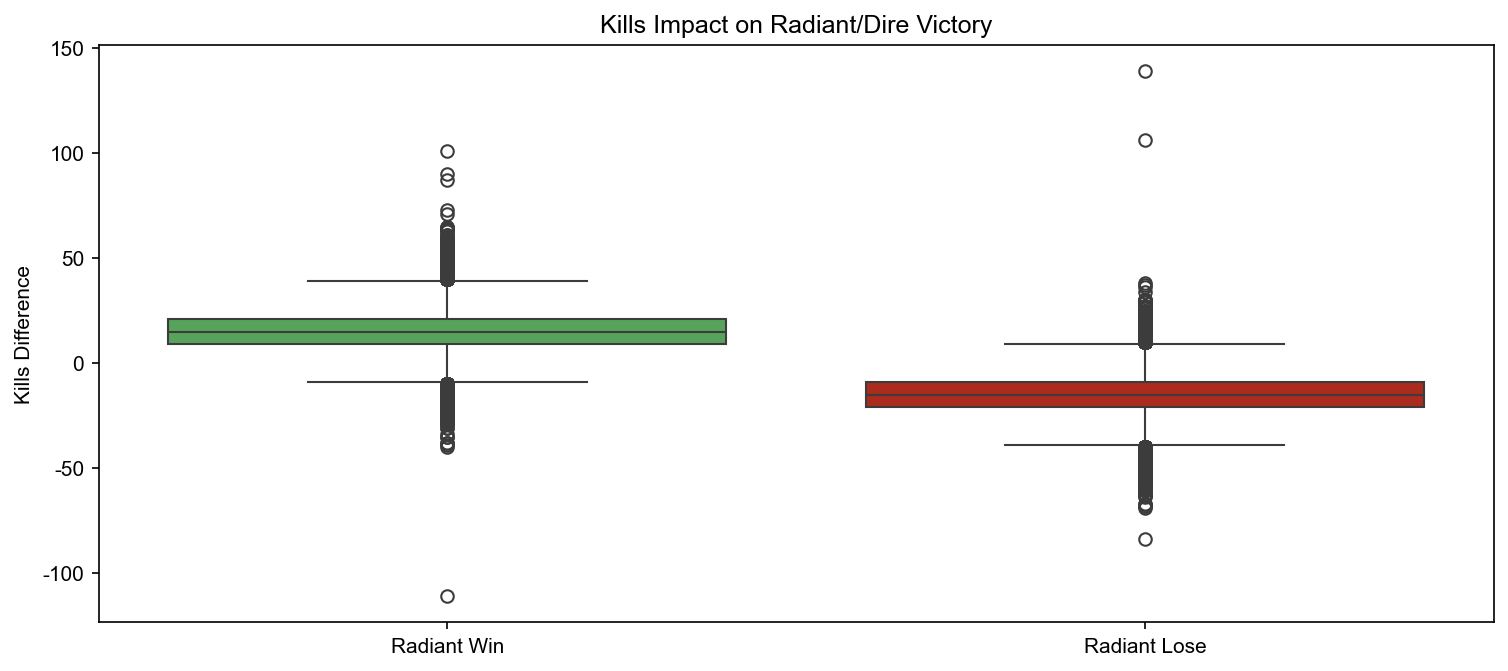

In [134]:
# plot kills diff vs radiant_win
dire_win_df = df[df['radiant_win'] == 0]
radiant_win_df = df[df['radiant_win'] == 1]

plt.figure(figsize=(12,5), dpi=150)
# sns.boxplot(data=dire_win_df, x='team_win', hue='team_win', y='kills_diff')
# sns.boxplot(data=radiant_win_df, x='team_win', hue='team_win', y='kills_diff')

# plot just 1 boxplot (recommended)
sns.boxplot(data=df, x='team_win', y='kills_diff', hue='team_win', palette=dota_palette)
plt.gca().set_xticklabels(['Radiant Win', 'Radiant Lose'])
plt.ylabel('Kills Difference')
plt.xlabel(None)
plt.title('Kills Impact on Radiant/Dire Victory')
plt.show()

* Acá vemos lo esperado, respecto a radiant, tener una diferencia de kills positiva normalmente indica la victoria, y una diferencia negativa indicaría una derrota (para dire en este caso)
* Vemos también que hay excepciones donde radiant suele ganar teniendo una diferencia negativa, ya que al final el objetivo para ganar no es obtener más kills que el enemigo, sino destruir su ancestro
* No es necesario graficar para dire, ya que el resultado sería el mismo

* Ahora haremos lo mismo para la diferencia de networth, pero solo en los registros válidos

In [126]:
df.isna().sum().sort_values(ascending=False)[df.isna().sum().sort_values(ascending=False)>0].index

Index(['radiant_player_2_networth', 'radiant_player_1_networth',
       'radiant_player_3_networth', 'dire_player_3_networth',
       'dire_player_5_networth', 'dire_player_4_networth',
       'dire_player_2_networth', 'dire_player_1_networth',
       'radiant_player_5_networth', 'radiant_player_4_networth'],
      dtype='object')

* Creamos las columnas de total de networth de dire y radiant, y la columna de diferencia

In [ ]:
radiant_networth_cols = ['radiant_player_2_networth', 'radiant_player_1_networth', 'radiant_player_3_networth', 'radiant_player_5_networth', 'radiant_player_4_networth']
dire_networth_cols = ['dire_player_3_networth', 'dire_player_5_networth', 'dire_player_4_networth', 'dire_player_2_networth', 'dire_player_1_networth']

valid_networth_df = df[df['radiant_player_1_networth'].notna()].copy()
valid_networth_df['radiant_networth'] = valid_networth_df[radiant_networth_cols].sum(axis=1)
valid_networth_df['dire_networth'] = valid_networth_df[dire_networth_cols].sum(axis=1)
valid_networth_df['networth_diff'] = valid_networth_df['radiant_networth'] - valid_networth_df['dire_networth']

C:\Users\RAFAEL-PC\AppData\Local\Temp\ipykernel_14892\2503414129.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Radiant Win', 'Radiant Lose'])


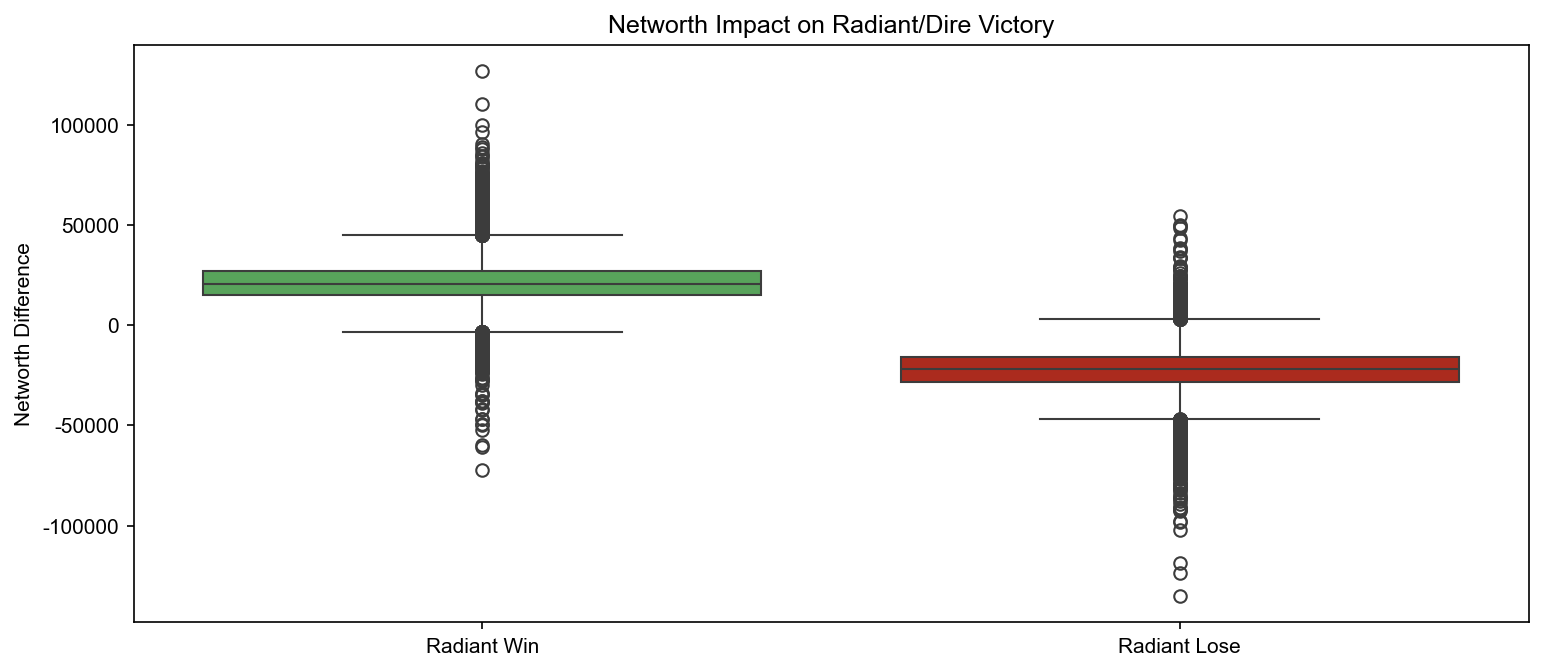

In [137]:
# plt the relation
plt.figure(figsize=(12,5), dpi=150)
sns.boxplot(data=valid_networth_df, x='team_win', y='networth_diff', hue='team_win', palette=dota_palette)
plt.gca().set_xticklabels(['Radiant Win', 'Radiant Lose'])
plt.ylabel('Networth Difference')
plt.xlabel(None)
plt.title('Networth Impact on Radiant/Dire Victory')
plt.show()

* Vemos que acá la diferencia es un poco más considerable, ya que las cajas están más separadas que el kills difference por ejemplo, por lo que se mantiene el hecho de que mientras mayor sea la diferencia de networth, más probabilidades de ganar tendrás

## Multivariate Analysis

* Vamos a visualizar las correlaciones entre todas las variables numericas independientes que vimos que pueden ser relevantes y la variable objetivo

In [140]:
numeric_cols

Index(['match_duration_seconds', 'first_blood_time_seconds',
       'radiant_player_1_networth', 'radiant_player_2_networth',
       'radiant_player_3_networth', 'radiant_player_4_networth',
       'radiant_player_5_networth', 'dire_player_1_networth',
       'dire_player_2_networth', 'dire_player_3_networth',
       'dire_player_4_networth', 'dire_player_5_networth'],
      dtype='object')

In [142]:
numeric_relevant_cols = ['networth_diff', 'kills_diff', 'match_duration_seconds', 'first_blood_time_seconds', 'radiant_win']

valid_networth_df[numeric_relevant_cols].corr()

,networth_diff,kills_diff,match_duration_seconds,first_blood_time_seconds,radiant_win
networth_diff,1.000000,0.863240,-0.050241,-0.002283,0.906302
kills_diff,0.863240,1.000000,-0.044202,-0.002277,0.831700
match_duration_seconds,-0.050241,-0.044202,1.000000,0.064965,-0.037479
first_blood_time_seconds,-0.002283,-0.002277,0.064965,1.000000,-0.000547
radiant_win,0.906302,0.831700,-0.037479,-0.000547,1.000000


[]

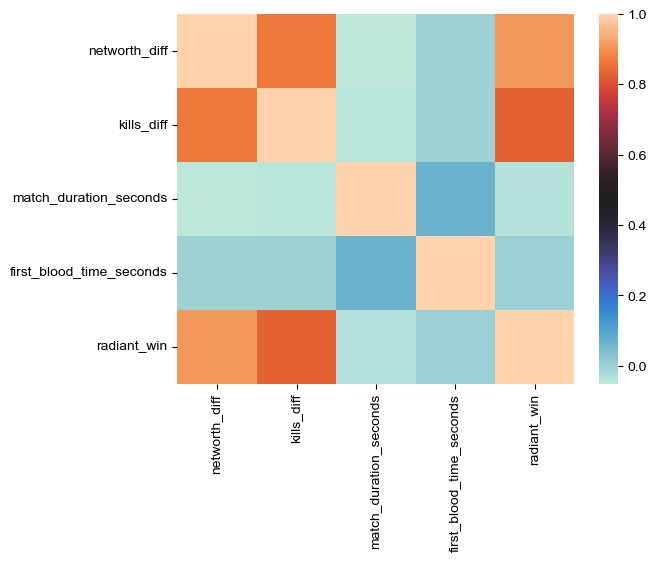

In [157]:
sns.heatmap(valid_networth_df[numeric_relevant_cols].corr(), cmap='icefire')
plt.plot()

Este gráfico nos muestra
* Alta correlación entre kills_diff y networth_diff
* Alta correlación entre networth_diff y radiant_win
* Alta correlación entre kills_diff y radiant_win
* Baja correlación entre las demás variables

    * Con esto podemos asegurar que networth_diff y kills_diff son las variables que más nos servirían en el caso de querer hacer un modelo de regresión logística, ya que están muy correlacionadas con la variable target

In [158]:
# save_file
valid_networth_df.to_parquet('./data/dota2_matches_analysed.parquet')